In [1]:
# importing required libraries that are having functions which will be used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression


In [2]:
#  Providing Data

x = np.array ([5,15,25,35,45,55]).reshape(-1,1)
y = np.array ([5,20,14,32,22,38])

In [3]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
  # previusly we made regression model through the following code: 
    #import statsmodels.api as sm
    #X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] ) 



In [5]:
# Create model and fitting it
# LinearRegression() also helps in performing linear regression
model = LinearRegression()

In [6]:
model.fit(x,y)

LinearRegression()

In [7]:
# any model .intercept_ gives C value or the regression equation y = bx + c

model.intercept_  

5.633333333333333

In [8]:
# model_name.coef_ gives beta or B value of regression y = Bx + C + e
model.coef_

array([0.54])

In [9]:
# provdes R Square value. R square value of 0.7158 means 71.58 percent of variance of dependent variable Y is
# explained by independent variable X
r_square = model.score(x,y)
r_square

0.715875613747954

In [10]:
y_pred = model.predict(x)

In [11]:
# predictive values of y
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [12]:
y

array([ 5, 20, 14, 32, 22, 38])

# fitting polynomial regression equation

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. The Polynomial Regression equation is given below:

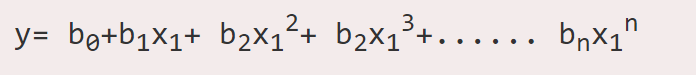

this exercise will also help to understand overfitted and underfitted models

In [13]:
# Reading the file curve.csv and printing first few examples
curve = pd.read_csv( "curve.csv" ) 
curve.head(10) 


,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770
5,10,3.042230
6,11,-3.943845
7,14,3.115570
8,15,0.142095
9,21,-2.610555


In [14]:
curve.shape

(50, 2)

Text(0, 0.5, 'y values')

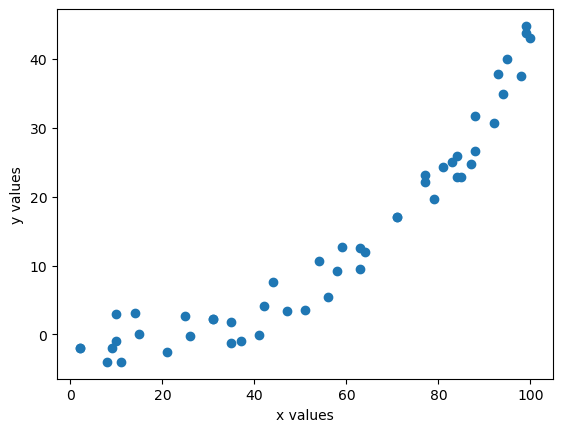

In [15]:
# making scatter diagram of variable x and y

plt.scatter( curve.x, curve.y ); 
plt.xlabel("x values") 
plt.ylabel("y values")

In [16]:
# lets use polyfit function to calculate non linear regression
# creating model named pol and and fitting data x and y into the model
pol = np.polyfit( curve.x, curve.y, deg = 1 ) 


In [17]:
# caling predicted y values from the model through the function polyval which is part of numpy library
curve['fit'] = np.polyval( pol, curve.x ) 
curve.head()

,x,y,fit
0,2,-1.999618,-9.568944
1,2,-1.999618,-9.568944
2,8,-3.978312,-6.936729
3,9,-1.969175,-6.498027
4,10,-0.957770,-6.059324


Text(0.5, 1.0, 'model is underfitted')

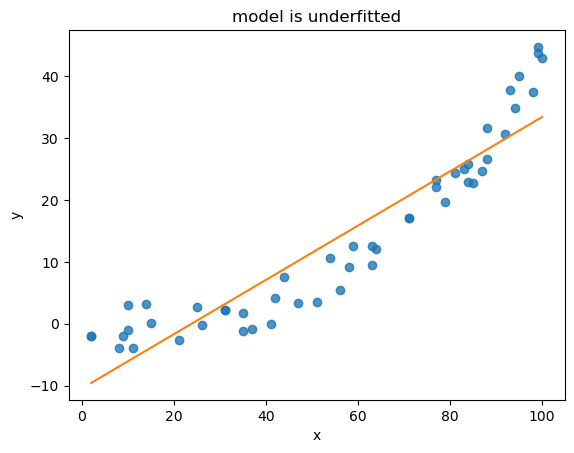

In [20]:
# This line is creating a scatterplot using seaborn's regplot function. 
# The fit_reg = False argument means it won't automatically fit a linear regression to the data.
sn.regplot( x=curve.x, y=curve.y, fit_reg = False )
# This line is plotting the fitted model curve, presumably calculated 
# elsewhere in your code and stored in curve.fit. 
# It will be a line plot that shows how the model fits the data.
plt.plot( curve.x, curve.fit, label='fit' )

plt.title("model is underfitted")

# Display the legend
#plt.legend()

# Show the plot
#plt.show()

# making function if same codes are need to be called again and again

In [23]:

# Input
# degree - polynomial terms to be used in the model
# polyfit from numpy is used to find polynomial model

def fit_poly( degree ): 
     # calling numpy method polyfit
     p = np.polyfit( curve.x, curve.y, deg = degree ) 
     curve['fit'] = np.polyval( p, curve.x ) 
     # This line uses the regplot function from the seaborn library to create a scatter plot of the original data. The fit_reg = False argument means that regplot won't automatically fit a regression line to the data.
     sn.regplot( x=curve.x, y=curve.y, fit_reg = False ) 
     # This line uses the plot function from the matplotlib.pyplot library to plot the fitted polynomial. The x-coordinates are given by curve.x, and the y-coordinates are the corresponding values of the fitted polynomial, given by curve.fit.
     return plt.plot( curve.x, curve.fit, label='fit' )

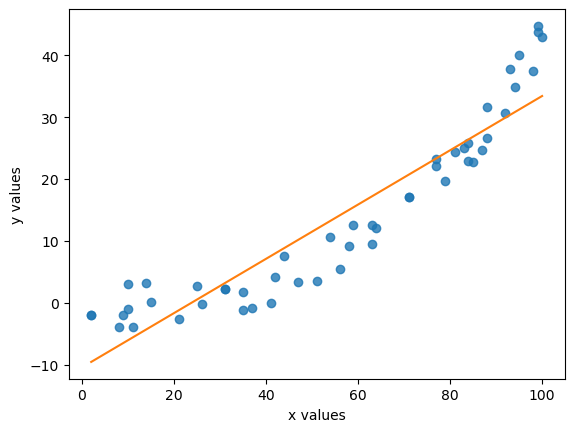

In [24]:
fit_poly( 1 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values");


In [25]:
np.polyfit( curve.x, curve.y, deg = 1 )

array([  0.43870242, -10.44634844])

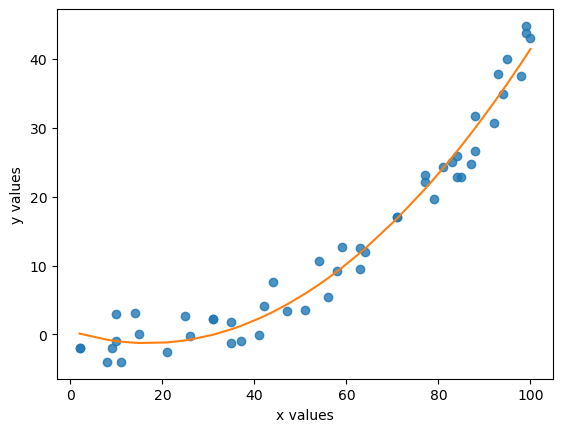

In [27]:
fit_poly( 2 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values"); 

In [29]:
np.polyfit( curve.x, curve.y, deg = 2 )

#The first value a is the coefficient for the term with power 2.
#The second value b is the coefficient for the term with power 1.
#The third value c is the constant term, also known as the y-intercept (when x is zero).

array([ 0.00618721, -0.20989619,  0.5251575 ])

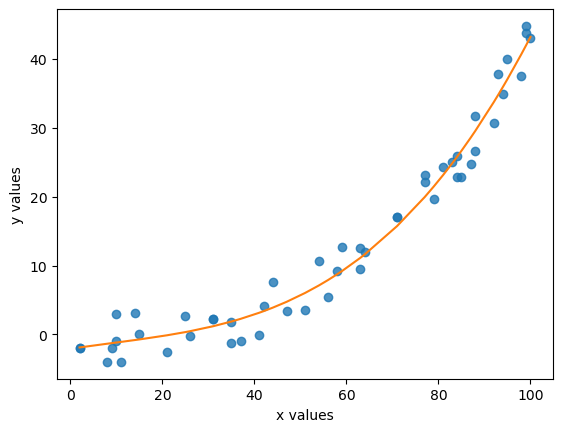

In [36]:
fit_poly( 3 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values"); 

In [37]:
np.polyfit( curve.x, curve.y, deg = 3 )

array([ 4.81995343e-05, -1.28521588e-03,  9.88618253e-02, -2.07164017e+00])

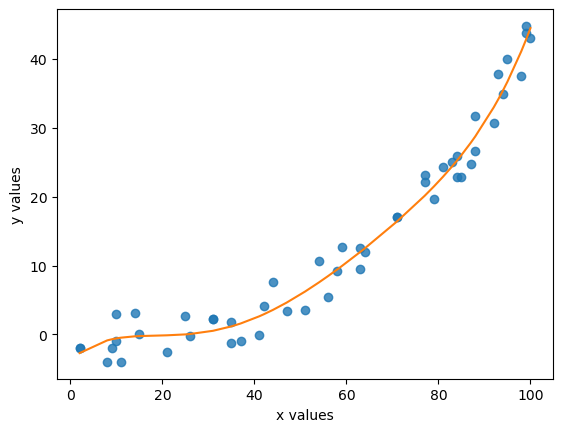

In [38]:
fit_poly( 5 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values"); 

In [39]:
np.polyfit( curve.x, curve.y, deg = 5 )

array([ 4.56931015e-08, -1.14078905e-05,  1.05286535e-03, -3.81556522e-02,
        6.07540111e-01, -3.76837675e+00])

C:\Users\davidc\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\davidc\AppData\Local\Temp\ipykernel_63252\3767227334.py:7: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit( curve.x, curve.y, deg = degree )


Text(0.5, 1.0, 'Model has started becoming overfitted')

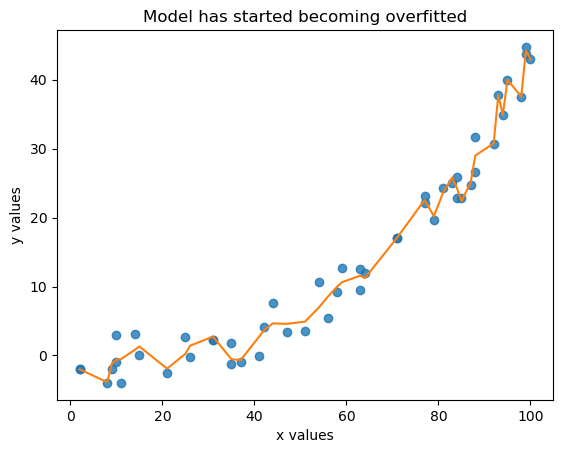

In [40]:
fit_poly( 150 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values"); 
plt.title("Model has started becoming overfitted")

C:\Users\davidc\AppData\Local\Temp\ipykernel_63252\3767227334.py:7: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit( curve.x, curve.y, deg = degree )


Text(0.5, 1.0, 'overfitted')

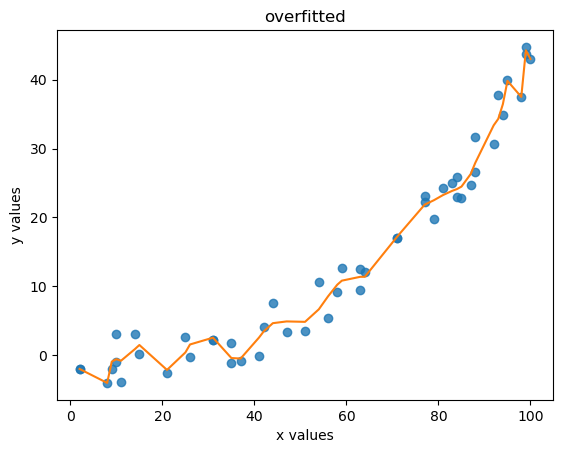

In [41]:
fit_poly( 40 ); 
## Plotting the model form and the data
plt.xlabel("x values") 
plt.ylabel("y values"); 
plt.title("overfitted")

What is bias?

Bias refers to the error that is introduced by approximating a real-world problem, which may be extremely complex, with a simplified model. High bias can cause an algorithm to miss relevant relations between features and target outputs (underfitting), meaning the model is oversimplified and does not learn the underlying patterns of the data. In this case, the model would have poor performance on both the training and testing data.


Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

What is variance?

Variance refers to the amount by which our model would change if we estimated it using a different training dataset. Models with high variance pay a lot of attention to fitting the individual data points in the training dataset that they perform poorly on data they haven't seen before, leading to overfitting. In this case, the model learns the noise from the training data, hence it performs very well on the training data but poorly on the unseen or test data.

The Bias-Variance Tradeoff is the point where we are adding just the right level of complexity to our model such that we minimize both the bias and the variance. If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand, if our model has a large number of parameters then it's going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

Bias and variance are part of the components of the mean squared error of prediction, which can be broken down into the irreducible error (error inherent in the problem itself), the squared bias, the variance, and the covariance. This relationship is often used to graphically illustrate the tradeoff between bias and variance.








Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

So the expected squared error at a point x is

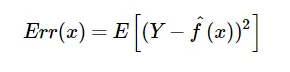

The Err(x) can be further decomposed as

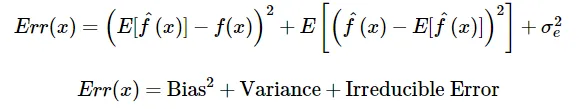

Err(x) is the sum of Bias², variance and the irreducible error.

Bias and variance using bulls-eye diagram
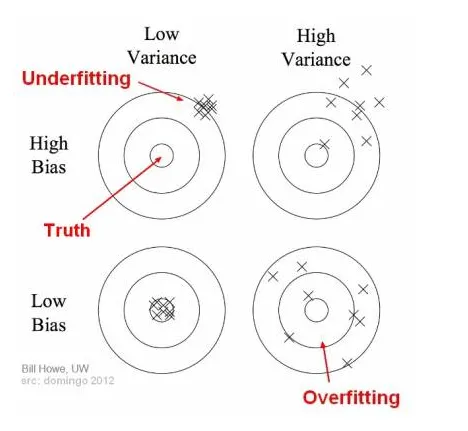

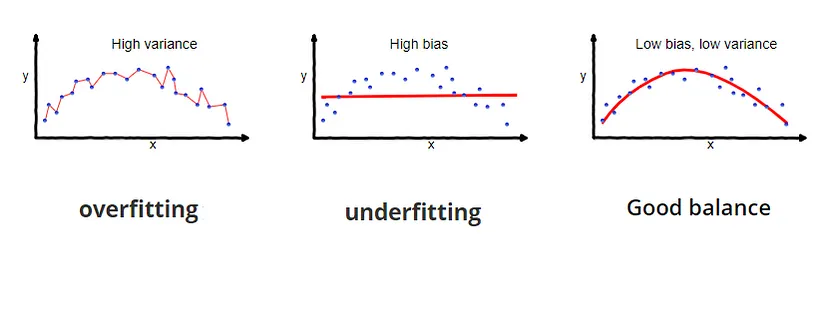

source: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## for self practice

divide the data into training and test and try making model through np.polyfit() and calculating pred_y values through polyval()

after that check model through r2_score or through sklearn.metrics.mean_squared_error()


from sklearn import metrics


metrics.r2_score(y_test, y_test_pred )